# Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supernova-classification-lox/GSOC_Data_DataCube.txt


In [2]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset= pd.read_csv('/kaggle/input/supernova-classification-lox/GSOC_Data_DataCube.txt', delimiter=' ', header = None)
#Columns from the information in documents
columns=['depth', 'delta_depth', 'velocity', 'delta_velocity','flux', 'mass','NickelMass', 'Energy', 'flag_mass',"radial_flag"]
dataset.columns= columns

In [4]:
dataset

,depth,delta_depth,velocity,delta_velocity,flux,mass,NickelMass,Energy,flag_mass,radial_flag
0,1.940628,0.179354,0.013531,0.000670,0.000003,0.75,0.15,0.75,hed8,hed8
1,2.071999,0.210287,0.012423,0.000615,0.000003,0.75,0.15,0.75,hed8,mwd
2,2.007982,0.198804,0.012744,0.000685,0.000003,0.75,0.15,0.75,hed8,N100
3,1.661535,0.189436,0.009935,0.000349,0.000003,0.75,0.15,0.75,hed8,w7dt
4,1.907672,0.178607,0.013343,0.000745,0.000003,0.75,0.15,2.00,hed8,hed8
...,...,...,...,...,...,...,...,...,...,...
507,2.651333,0.177355,0.011914,0.000536,0.000014,2.00,0.75,0.75,w7dt,w7dt
508,2.664973,0.149239,0.010600,0.000432,0.000014,2.00,0.75,2.00,w7dt,hed8
509,3.401588,0.213209,0.011660,0.000410,0.000014,2.00,0.75,2.00,w7dt,mwd
510,3.091225,0.191139,0.011329,0.000494,0.000014,2.00,0.75,2.00,w7dt,N100


# EDA

In [5]:
data=dataset.copy()

In [6]:
data.dtypes

depth             float64
delta_depth       float64
velocity          float64
delta_velocity    float64
flux              float64
mass              float64
NickelMass        float64
Energy            float64
flag_mass          object
radial_flag        object
dtype: object

Defining Input and Output features which would help in Data Analysis

In [7]:
in_cols= columns[0:5]
out_numcols= columns[5:8]
out_txtcols= columns[8:10]

## Input Columns Visualisation

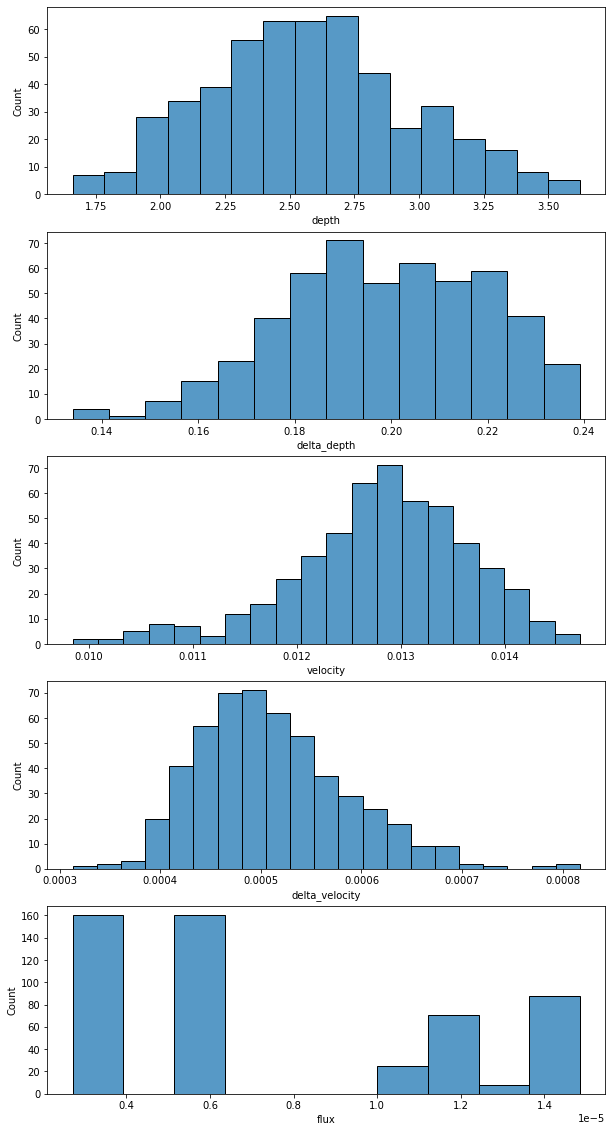

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [8]:
fig, axes = plt.subplots(nrows=len(in_cols),  figsize=(10,20))
for i in range(len(in_cols)):
    feature = in_cols[i]
    plt.figure(figsize = (5, 5))
    sns.histplot(x=data[feature].dropna(), ax=axes[i])
    

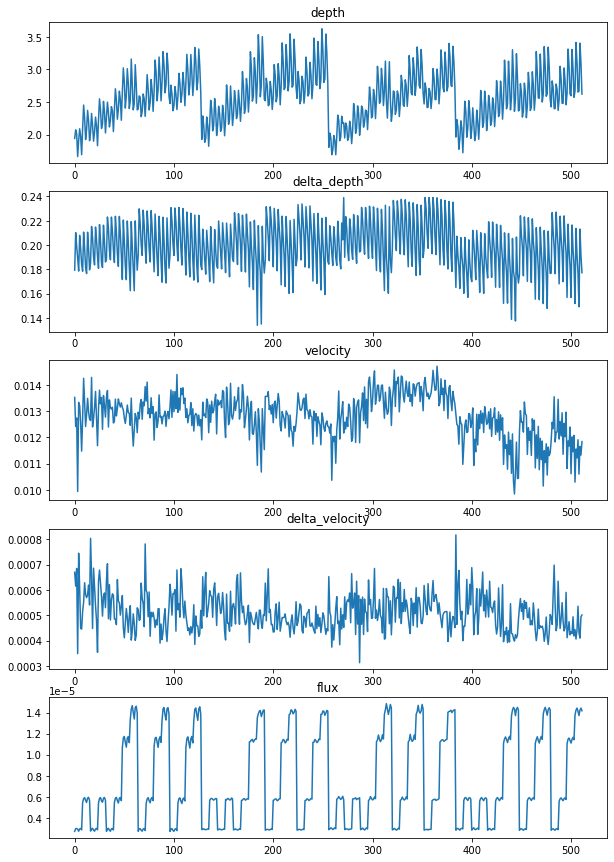

In [9]:
fig, ax = plt.subplots(len(in_cols), figsize=(10,15))
for i in range(len(in_cols)):
    ax[i].plot(data[in_cols[i]])
    ax[i].title.set_text(in_cols[i])

## Output Column Visualisation

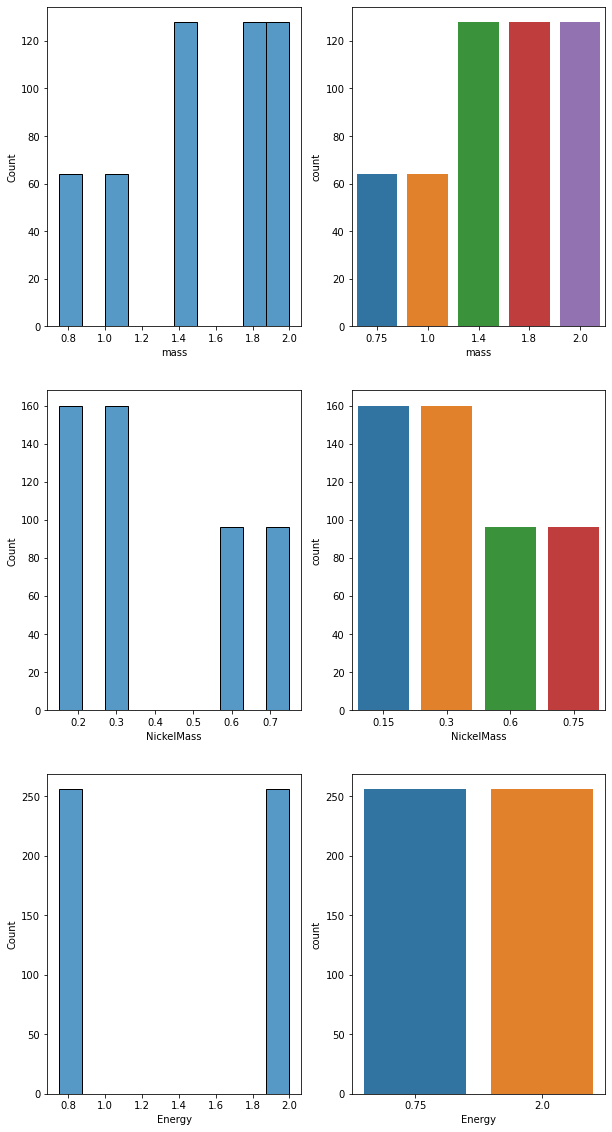

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [10]:
fig, axes = plt.subplots(nrows=len(out_numcols),ncols=2,figsize=(10,20))
for i in range(len(out_numcols)):
    feature = out_numcols[i]
    plt.figure(figsize = (5, 5))
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.countplot(x=data[feature].dropna(), ax=axes[i][1])

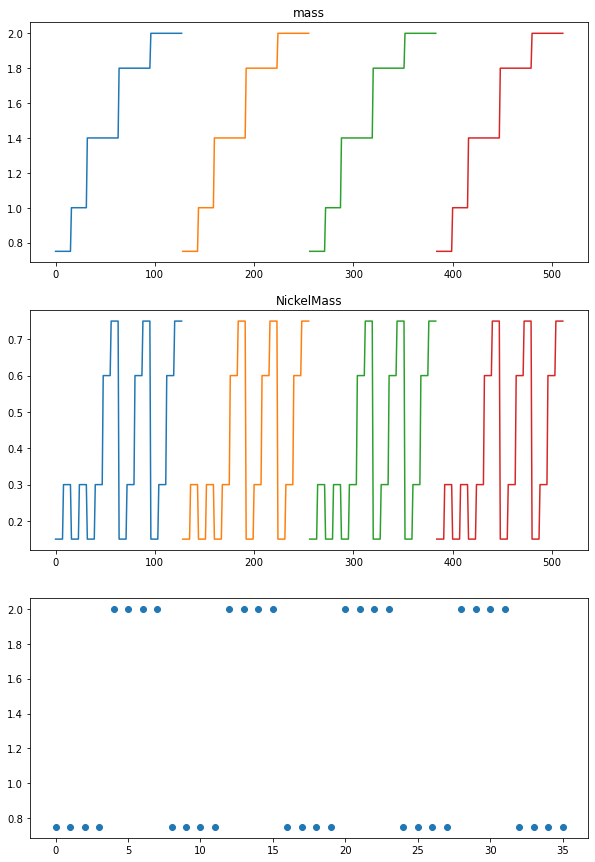

In [11]:
fig, ax = plt.subplots(len(out_numcols), figsize=(10,15))
plot_base=np.arange(512)
for i in range(len(out_numcols)):
    if(i<2):
        ax[i].plot(data[out_numcols[i]][0:128])
        ax[i].plot(data[out_numcols[i]][128:256])
        ax[i].plot(data[out_numcols[i]][256:384])
        ax[i].plot(data[out_numcols[i]][384:512])
        ax[i].title.set_text(out_numcols[i])
    if (i==2):
        ax[i]=plt.scatter(plot_base[0:36], data[out_numcols[i]][0:36])

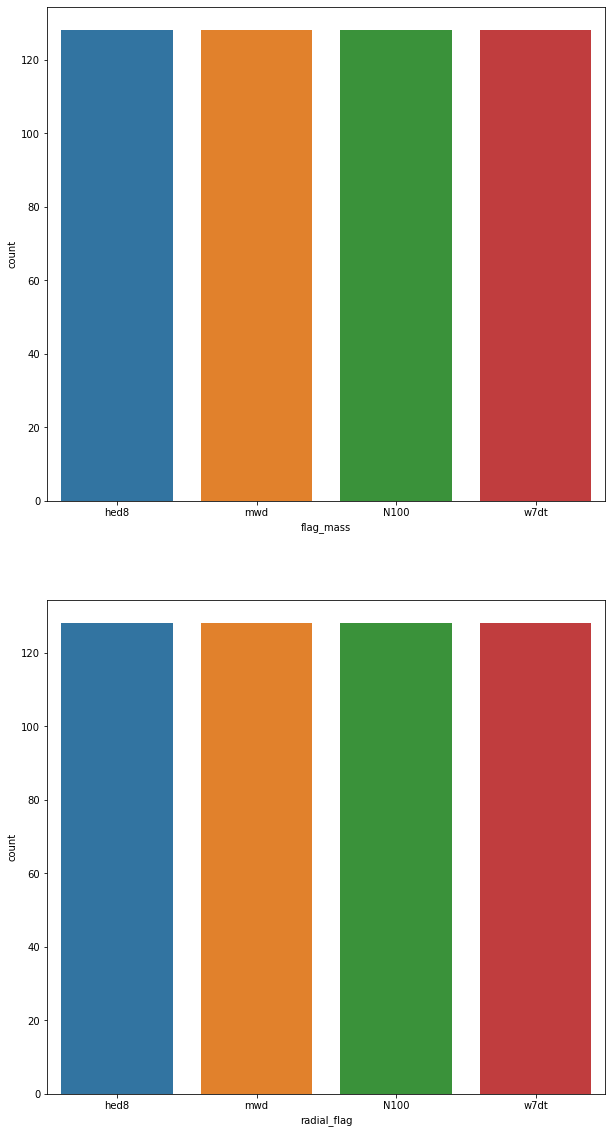

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=len(out_txtcols),figsize=(10,20))
for i in range(len(out_txtcols)):
    feature = out_txtcols[i]
    plt.figure(figsize = (5, 5))
    sns.countplot(x=data[feature].dropna(), ax=axes[i])

# Feature Analysis

In [13]:
#Are there Outliers?
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((data < (lower_range)) | (data > (upper_range))).sum()/len(data) * 100

Number of Outliers (Percentage):


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


Energy            0.000000
NickelMass        0.000000
delta_depth       0.390625
delta_velocity    0.976562
depth             0.195312
flag_mass         0.000000
flux              0.000000
mass              0.000000
radial_flag       0.000000
velocity          3.515625
dtype: float64

<AxesSubplot:>

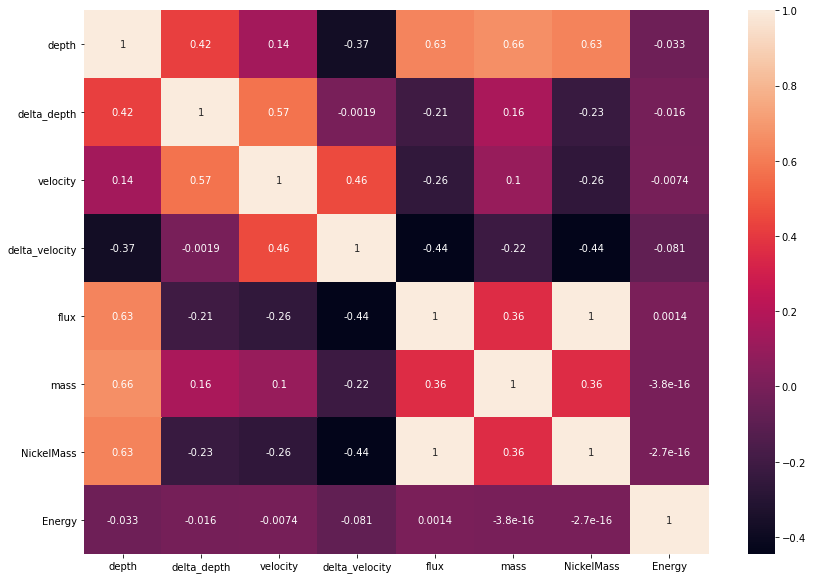

In [14]:
plt.figure(figsize = (14, 10))
corr_mat = data.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

# Data Normalise
Trying to Normalise data
either by Standard Scalar or MinMax Scalar

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler

In [16]:
dataMinMax= data.copy()

In [17]:
autoscaler = MinMaxScaler()
dataMinMax[in_cols] = autoscaler.fit_transform(dataMinMax[in_cols])

In [18]:
autoscalar1= StandardScaler()
dataStd= data.copy()
dataStd[in_cols]=autoscalar1.fit_transform(dataStd[in_cols])

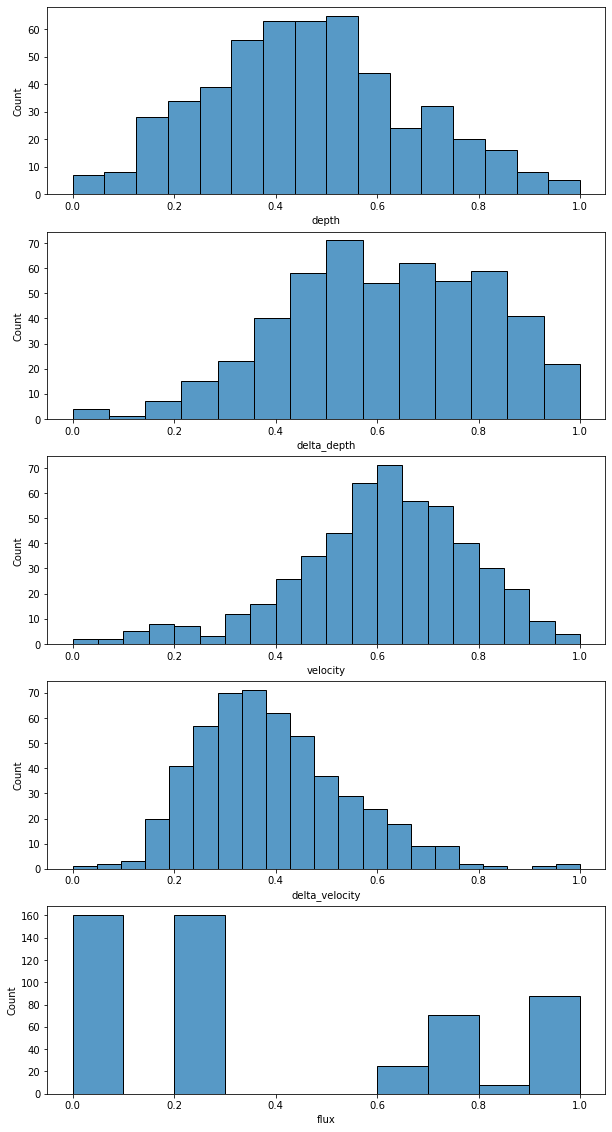

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [19]:
fig, axes = plt.subplots(nrows=len(in_cols),  figsize=(10,20))
for i in range(len(in_cols)):
    feature = in_cols[i]
    plt.figure(figsize = (5, 5))
    sns.histplot(x=dataMinMax[feature].dropna(), ax=axes[i])

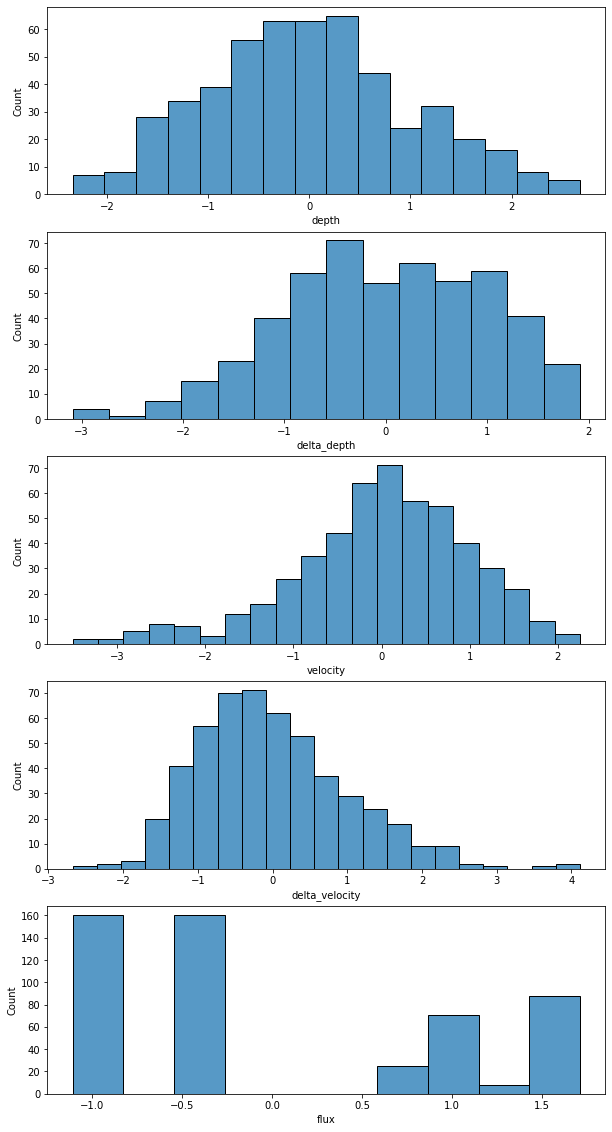

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [20]:
fig, axes = plt.subplots(nrows=len(in_cols),  figsize=(10,20))
for i in range(len(in_cols)):
    feature = in_cols[i]
    plt.figure(figsize = (5, 5))
    sns.histplot(x=dataStd[feature].dropna(), ax=axes[i])

# Model Machine Learning

My strategy would be to treat it as a regression problem for the physical parameters with known numeric values. Then use all these columns to classify among the labels in last two categorical columns.

In [21]:
#Import Dependancies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression,RidgeClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



## Data Preparation 
* MinMax Data 
* 5-3 column prediction 
* without encoding

In [22]:
physical_parameters=['mass', 'NickelMass','Energy','flag_mass','radial_flag']
dataMinMax1= dataMinMax.copy()

In [23]:
#dataMinMax1[physical_parameters]= dataMinMax1[physical_parameters].astype('category')
#dataMinMax1[physical_parameters] = dataMinMax1[physical_parameters].apply(lambda x: x.cat.codes)
print(dataMinMax1[100:110])

        depth  delta_depth  velocity  delta_velocity      flux  mass  \
100  0.397999     0.546339  0.643598        0.540668  0.000747   2.0   
101  0.547384     0.917677  0.800781        0.571615  0.017709   2.0   
102  0.489022     0.806278  0.667096        0.246844  0.021440   2.0   
103  0.367806     0.622553  0.935076        0.725639  0.006463   2.0   
104  0.473251     0.503906  0.638916        0.413577  0.221287   2.0   
105  0.651373     0.921948  0.750712        0.461259  0.256253   2.0   
106  0.574141     0.786861  0.656411        0.356323  0.262652   2.0   
107  0.424883     0.599723  0.827202        0.735519  0.236074   2.0   
108  0.486210     0.471760  0.777770        0.629097  0.218062   2.0   
109  0.657995     0.913726  0.830961        0.446021  0.254648   2.0   

     NickelMass  Energy flag_mass radial_flag  
100        0.15    2.00      hed8        hed8  
101        0.15    2.00      hed8         mwd  
102        0.15    2.00      hed8        N100  
103        0.15

## Data Splitts

In [24]:
y1MinMax = dataMinMax1[physical_parameters]
x1MinMax = dataMinMax1[in_cols]

In [25]:
y1MinMax

,mass,NickelMass,Energy,flag_mass,radial_flag
0,0.75,0.15,0.75,hed8,hed8
1,0.75,0.15,0.75,hed8,mwd
2,0.75,0.15,0.75,hed8,N100
3,0.75,0.15,0.75,hed8,w7dt
4,0.75,0.15,2.00,hed8,hed8
...,...,...,...,...,...
507,2.00,0.75,0.75,w7dt,w7dt
508,2.00,0.75,2.00,w7dt,hed8
509,2.00,0.75,2.00,w7dt,mwd
510,2.00,0.75,2.00,w7dt,N100


In [26]:
y1MinMax['mass']

0      0.75
1      0.75
2      0.75
3      0.75
4      0.75
       ... 
507    2.00
508    2.00
509    2.00
510    2.00
511    2.00
Name: mass, Length: 512, dtype: float64

In [37]:
x_train1MinMax, x_test1MinMax, y_train1MinMax, y_test1MinMax = train_test_split(x1MinMax, y1MinMax['mass'], test_size=0.2, random_state=42)
x_val1MinMax, x_test1MinMax, y_val1MinMax, y_test1MinMax = train_test_split(x_test1MinMax, y_test1MinMax, test_size=0.5, random_state=42)
print(x_train1MinMax.shape)
print(x_val1MinMax.shape)
print(x_test1MinMax.shape)
print(y_train1MinMax.shape)
print(y_val1MinMax.shape)
print(y_test1MinMax.shape)

(409, 5)
(51, 5)
(52, 5)
(409,)
(51,)
(52,)


In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression,RidgeClassifier,Ridge,RidgeCV
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,StackingClassifier,StackingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, plot_confusion_matrix

In [41]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
stack4 = StackingRegressor(estimators=estimators,
                        final_estimator=RandomForestRegressor(n_estimators=10,
                                                              random_state=42))
stack4.fit(x_train1MinMax, y_train1MinMax).score(x_val1MinMax,y_val1MinMax)
#y_pred4MinMax = stack4.predict(x_val4MinMax)
#print(accuracy_score(y_val4MinMax, y_pred4MinMax))
#print(classification_report(y_val4MinMax, y_pred4MinMax))

# Plot the confusion matrix using the provided functions.
#plot_confusion_matrix(stack4, x_val4MinMax, y_val4MinMax)  
#plt.show()  

0.6171242619570763

In [28]:
linear=LogisticRegression(C=21.5443469, class_weight=None, dual=False,
                   fit_intercept='False', intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.001668,
                   verbose=0, warm_start=False)
linear.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = linear.predict(x_val1MinMax)
#print(accuracy_score(y_val1, y_pred1))
#print(confusion_matrix(y_val1, y_pred1))
print(classification_report(y_val1MinMax, y_pred1MinMax))

ValueError: Unknown label type: 'continuous'

In [ ]:
Decision1= DecisionTreeClassifier(max_depth=5) 
Decision2= DecisionTreeClassifier(max_depth=50)
Decision3= DecisionTreeClassifier(max_depth=40)

In [ ]:
Decision= Decision3
Decision.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = Decision.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))

In [ ]:
random1 = RandomForestClassifier(max_depth=75, n_estimators=2000)
random2 = RandomForestClassifier(max_depth=2, n_estimators=2000)

In [ ]:
random=random2
random.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = random.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))

In [ ]:
est = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='adam',
                         learning_rate='adaptive', max_iter=15000)

estimators = [('lr',LogisticRegression(C=12000.0, class_weight=None, dual=False,
                   fit_intercept='False', intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=8e-05, verbose=0,
                   warm_start=False)),
              ('rc',RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
                fit_intercept='False', max_iter=50, normalize='True',
                random_state=None, solver='cholesky', tol=1e-08)),
              ('et',ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                    max_depth=1000.0, max_features='log2', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='best')),
              ('dt',DecisionTreeClassifier(max_depth=40)),
              ('rf',RandomForestClassifier(max_depth=5, n_estimators=2000)),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier())]
stack = StackingClassifier(estimators=estimators, final_estimator=est)
stack.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = stack.predict(x_val1MinMax)
print(accuracy_score(y_val1MinMax, y_pred1MinMax))
print(classification_report(y_val1MinMax, y_pred1MinMax))

# Plot the confusion matrix using the provided functions.
plot_confusion_matrix(stack, x_val1MinMax, y_val1MinMax)  
plt.show()  

In [ ]:
y_test1= stack.predict(x_test1MinMax)
print(accuracy_score(y_test1MinMax, y_test1))
print(classification_report(y_test1MinMax, y_test1))
plot_confusion_matrix(stack, x_test1MinMax, y_test1MinMax) 

In [ ]:
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = AdaBoost.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))


In [ ]:
dt=DecisionTreeClassifier(max_depth=40)

est1 = dt
Ada1 = AdaBoostClassifier(base_estimator=est1)

In [ ]:
Ada1.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = Ada1.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
XGB = XGBClassifier()
XGB.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = XGB.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))

In [ ]:
param_grid = [    
    {'booster' : ['gbtree','dart'],
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }
]

In [ ]:
est = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
est.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = est.predict(x_val1MinMax)
print(classification_report(y_val1MinMax, y_pred1MinMax))

In [ ]:
est = MLPClassifier(hidden_layer_sizes=100, activation='tanh', solver='adam',
                         learning_rate='adaptive', max_iter=15000)

estimators = [('lr',LogisticRegression(C=12000.0, class_weight=None, dual=False,
                   fit_intercept='False', intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=8e-05, verbose=0,
                   warm_start=False)),
              ('rc',RidgeClassifier(alpha=0.0001, class_weight=None, copy_X=True,
                fit_intercept='False', max_iter=50, normalize='True',
                random_state=None, solver='cholesky', tol=1e-08)),
              ('et',ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                    max_depth=1000.0, max_features='log2', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='best')),
              ('dt',DecisionTreeClassifier(max_depth=40)),
              ('rf',RandomForestClassifier(max_depth=5, n_estimators=2000)),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier())]
stack = StackingClassifier(estimators=estimators, final_estimator=est)
stack.fit(x_train1MinMax, y_train1MinMax)
y_pred1MinMax = stack.predict(x_val1MinMax)
print(accuracy_score(y_val1MinMax, y_pred1MinMax))
print(classification_report(y_val1MinMax, y_pred1MinMax))

# Plot the confusion matrix using the provided functions.
plot_confusion_matrix(stack, x_val1MinMax, y_val1MinMax)  
plt.show()  

# Predicting Nickel Mass

In [ ]:
x2MinMax= dataMinMax1[dataMinMax.columns[0:6]]
y2MinMax=dataMinMax1['NickelMass']

In [ ]:
x2MinMax

In [ ]:
x_train2MinMax, x_test2MinMax, y_train2MinMax, y_test2MinMax = train_test_split(x2MinMax, y2MinMax, test_size=0.2, random_state=42)
x_val2MinMax, x_test2MinMax, y_val2MinMax, y_test2MinMax = train_test_split(x_test2MinMax, y_test2MinMax, test_size=0.5, random_state=42)
print(x_train2MinMax.shape)
print(x_val2MinMax.shape)
print(x_test2MinMax.shape)
print(y_train2MinMax.shape)
print(y_val2MinMax.shape)
print(y_test2MinMax.shape)

In [ ]:
randomNickel= RandomForestClassifier(max_depth=1, n_estimators=1000)
randomNickel.fit(x_train2MinMax, y_train2MinMax)
y_pred2MinMax = randomNickel.predict(x_val2MinMax)
print(classification_report(y_pred2MinMax,y_val2MinMax))

In [ ]:
y_testing= randomNickel.predict(x_test2MinMax)
print(classification_report(y_test2MinMax,y_testing))

In [ ]:
dtNickel= DecisionTreeClassifier()
dtNickel.fit(x_train2MinMax, y_train2MinMax)
y_pred2MinMax=dtNickel.predict(x_val2MinMax)
print(classification_report(y_pred2MinMax,y_val2MinMax))

In [ ]:
y_testing= dtNickel.predict(x_test2MinMax)
print(classification_report(y_test2MinMax,y_testing))

In [ ]:
XGBNickel = XGBClassifier()
XGBNickel.fit(x_train2MinMax, y_train2MinMax)
y_pred2MinMax = XGBNickel.predict(x_val2MinMax)
print(classification_report(y_val2MinMax, y_pred2MinMax))

# Predict Energy

In [ ]:
x3MinMax= dataMinMax1[dataMinMax.columns[0:5]]
y3MinMax=dataMinMax1['Energy']
print(x3MinMax, y3MinMax)

In [ ]:
x_train3MinMax, x_test3MinMax, y_train3MinMax, y_test3MinMax = train_test_split(x3MinMax, y3MinMax, test_size=0.2, random_state=42)
x_val3MinMax, x_test3MinMax, y_val3MinMax, y_test3MinMax = train_test_split(x_test3MinMax, y_test3MinMax, test_size=0.5, random_state=42)
print(x_train3MinMax.shape)
print(x_val3MinMax.shape)
print(x_test3MinMax.shape)
print(y_train3MinMax.shape)
print(y_val3MinMax.shape)
print(y_test3MinMax.shape)

In [ ]:
randomEnergy= RandomForestClassifier(max_depth=2, n_estimators=1000)
randomEnergy.fit(x_train3MinMax, y_train3MinMax)
y_pred3MinMax = randomEnergy.predict(x_val3MinMax)
print(classification_report(y_pred3MinMax,y_val3MinMax))

In [ ]:
dtEnergy= DecisionTreeClassifier(max_depth=2)
dtEnergy.fit(x_train3MinMax, y_train3MinMax)
y_pred3MinMax = dtEnergy.predict(x_val3MinMax)
print(classification_report(y_pred3MinMax,y_val3MinMax))

# Initial flag

In [ ]:
x4MinMax= dataMinMax1[dataMinMax.columns[0:5]]
y4MinMax=dataMinMax1['flag_mass']
print(x4MinMax, y4MinMax)

In [ ]:
x_train4MinMax, x_test4MinMax, y_train4MinMax, y_test4MinMax = train_test_split(x4MinMax, y4MinMax, test_size=0.2, random_state=42)
x_val4MinMax, x_test4MinMax, y_val4MinMax, y_test4MinMax = train_test_split(x_test4MinMax, y_test4MinMax, test_size=0.5, random_state=42)
print(x_train4MinMax.shape)
print(x_val4MinMax.shape)
print(x_test4MinMax.shape)
print(y_train4MinMax.shape)
print(y_val4MinMax.shape)
print(y_test4MinMax.shape)

In [ ]:
dtflagmass= DecisionTreeClassifier(max_depth=4)
dtflagmass.fit(x_train4MinMax, y_train4MinMax)
y_pred4MinMax = dtflagmass.predict(x_val4MinMax)
print(classification_report(y_pred4MinMax,y_val4MinMax))

In [ ]:
randomflagmass= RandomForestClassifier(max_depth=30)
randomflagmass.fit(x_train4MinMax, y_train4MinMax)
y_pred4MinMax = randomflagmass.predict(x_val4MinMax)
print(classification_report(y_pred4MinMax,y_val4MinMax))

In [ ]:
y_testing= randomflagmass.predict(x_test4MinMax)
print(classification_report(y_testing,y_test4MinMax))

In [ ]:
mlpcflagmass=MLPClassifier(hidden_layer_sizes=200, activation='tanh', solver='adam',
                         learning_rate='adaptive', max_iter=250)
mlpcflagmass.fit(x_train4MinMax, y_train4MinMax)
y_pred4MinMax = mlpcflagmass.predict(x_val4MinMax)
print(classification_report(y_pred4MinMax,y_val4MinMax))

In [ ]:
est = RandomForestClassifier()

estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
             ('xg', XGBClassifier())]
stack4 = StackingClassifier(estimators=estimators, final_estimator=est)
stack4.fit(x_train4MinMax, y_train4MinMax)
y_pred4MinMax = stack4.predict(x_val4MinMax)
print(accuracy_score(y_val4MinMax, y_pred4MinMax))
print(classification_report(y_val4MinMax, y_pred4MinMax))

# Plot the confusion matrix using the provided functions.
plot_confusion_matrix(stack4, x_val4MinMax, y_val4MinMax)  
plt.show()  

In [ ]:
y_testing= stack4.predict(x_test4MinMax)
print(classification_report(y_testing,y_test4MinMax))

# Radial Distribution Flag

In [ ]:
x5MinMax= dataMinMax1[dataMinMax.columns[0:5]]
y5MinMax=dataMinMax1['radial_flag']
print(x4MinMax, y4MinMax)

In [ ]:
x_train5MinMax, x_test5MinMax, y_train5MinMax, y_test5MinMax = train_test_split(x5MinMax, y5MinMax, test_size=0.2, random_state=42)
x_val5MinMax, x_test5MinMax, y_val5MinMax, y_test5MinMax = train_test_split(x_test5MinMax, y_test5MinMax, test_size=0.5, random_state=42)
print(x_train5MinMax.shape)
print(x_val5MinMax.shape)
print(x_test5MinMax.shape)
print(y_train5MinMax.shape)
print(y_val5MinMax.shape)
print(y_test5MinMax.shape)

In [ ]:
randomflagrad= RandomForestClassifier(max_depth=11)
randomflagrad.fit(x_train5MinMax, y_train5MinMax)
y_pred5MinMax = randomflagrad.predict(x_val5MinMax)
print(classification_report(y_pred5MinMax,y_val5MinMax))

In [ ]:
y_testrand= randomflagrad.predict(x_test5MinMax)
print(classification_report(y_testrand,y_test5MinMax))

In [ ]:
est = RandomForestClassifier()

estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
             ('xg', XGBClassifier())]
stack5 = StackingClassifier(estimators=estimators, final_estimator=est)
stack5.fit(x_train5MinMax, y_train5MinMax)
y_pred5MinMax = stack5.predict(x_val5MinMax)
print(accuracy_score(y_val5MinMax, y_pred5MinMax))
print(classification_report(y_val5MinMax, y_pred5MinMax))

# Plot the confusion matrix using the provided functions.
plot_confusion_matrix(stack5, x_val5MinMax, y_val5MinMax)  
plt.show()  

In [ ]:
y_testing= stack5.predict(x_test5MinMax)
print(y_testing)
print(classification_report(y_testing,y_test5MinMax))

Another One would be to treat even the numeric columns as categories. As they all have just some fixed values. This might be flawed approach when the data is real world and not simulated streamlined data. Nonetheless, it is worth probing. 